In [24]:

!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/293.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/293.3 kB ? eta -:--:--
     --- --------------------------------- 30.7/293.3 kB 186.2 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/293.3 kB 195.7 kB/s eta 0:00:02
     ------- ----------------------------- 61.4/293.3 kB 233.8 kB/s eta 0:00:01
     --------- --------------------------- 71.7/293.3 kB 245.8 kB/s eta 0:00:01
     ------------- ---------------------- 112.6/293.3 kB 312.2 kB/s eta 0:00:01
     ----------------- ------------------ 143.4/293.3 kB 355.0 kB/s eta 0:00:01
     ------------------ ----------------- 153.6/293.3 kB 352.2 kB/s eta 0:00:01
     --------------------- -------------- 174.1/293.3 kB 361.7 kB/s eta 0:00:01
     ------------------------- ---------- 204.8/293.3 kB 389.1 kB/s eta 0:00:01
     --------------------------- -------- 225.3/293.3 kB 38

In [29]:
import pymssql as pmsql
import mysql.connector as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
con = sql.connect(
    host='localhost',
    database='mintclassics',
    user='root',
    password='root'
)

In [10]:
cur = con.cursor();

In [35]:
query ="select wh.warehouseCode,wh.warehouseName, sum(pd.quantityInStock) as total_product_in_stock \
from warehouses wh \
inner join products pd \
on pd.warehouseCode = wh.warehouseCode \
group by wh.warehouseCode"

cur.execute(query);
result = cur.fetchall();
df = pd.DataFrame(result,columns=["WarehouseCode", "WarehouseName", "TotalProductInStock"])
df

,WarehouseCode,WarehouseName,TotalProductInStock
0,a,North,131688
1,b,East,219183
2,c,West,124880
3,d,South,79380


Text(0.5, 1.0, 'Total Product In Stock by Warehouse')

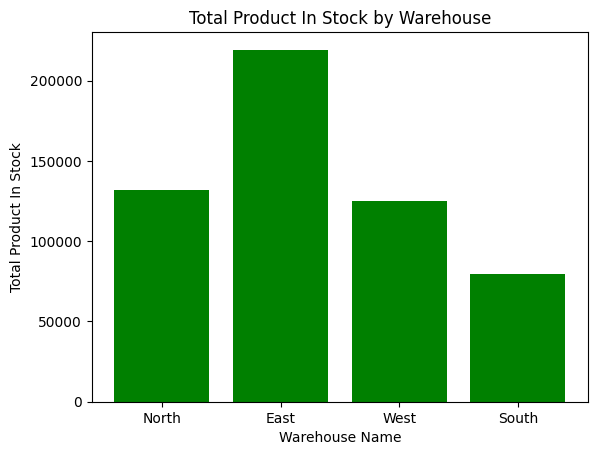

In [43]:
gr = plt.bar(df["WarehouseName"],df["TotalProductInStock"], color='g')
plt.xlabel("Warehouse Name")
plt.ylabel("Total Product In Stock")
plt.title("Total Product In Stock by Warehouse")

In [49]:
queryTwo = "SELECT pd.productCode,productName,quantityInStock, coalesce(sum(quantityOrdered),0) as total_ordered_prods \
FROM mintclassics.products pd \
left join orderdetails od \
on od.productCode = pd.productCode \
group by pd.productCode \
order by total_ordered_prods asc"

cur.execute(queryTwo)
resultT = cur.fetchall();
dft = pd.DataFrame(resultT, columns=["productCode","productName","InStockProducts","SoldProducts"])
dft

,productCode,productName,InStockProducts,SoldProducts
0,S18_3233,1985 Toyota Supra,7733,0
1,S18_4933,1957 Ford Thunderbird,3209,767
2,S24_1046,1970 Chevy Chevelle SS 454,1005,803
3,S24_3969,1936 Mercedes Benz 500k Roadster,2081,824
4,S18_2248,1911 Ford Town Car,540,832
...,...,...,...,...
105,S50_1341,1930 Buick Marquette Phaeton,7062,1074
106,S18_3856,1941 Chevrolet Special Deluxe Cabriolet,2378,1076
107,S700_4002,American Airlines: MD-11S,8820,1085
108,S18_1342,1937 Lincoln Berline,8693,1111


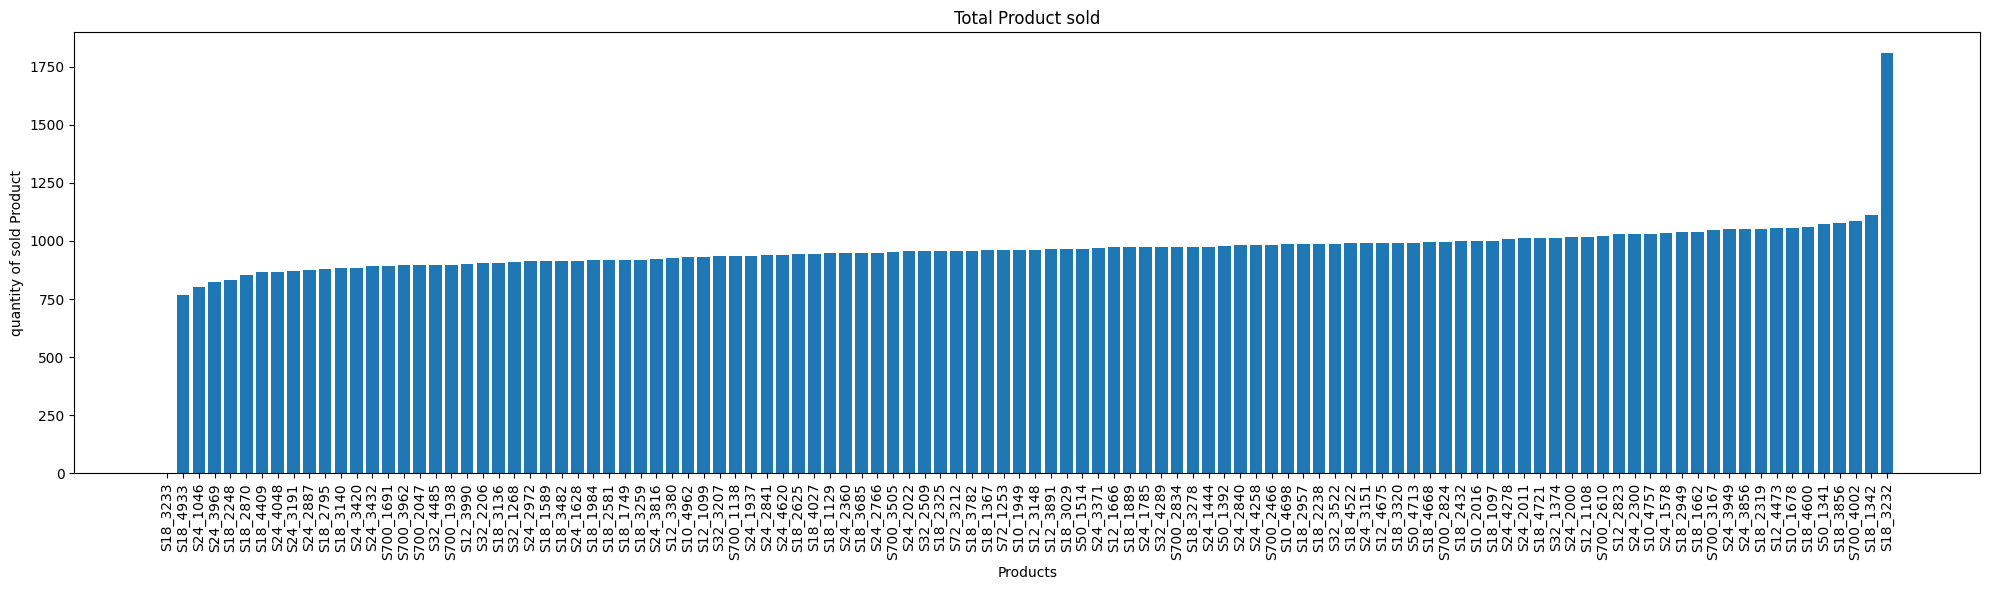

In [68]:
plt.figure(figsize=(20,6))
bar_width = 3000
gr = plt.bar(dft['productCode'],dft['SoldProducts'])

plt.xlabel("Products")
plt.ylabel("quantity of sold Product")
plt.title("Total Product sold")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()